In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Suppress warnings for better clarity
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\3D Objects\CyberPowerML/nsl-kdd.csv')

In [3]:
data.tail(10)

,Duration,Protocol Type,Service,Flag,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Diff Src Port Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,target
148507,0,tcp,http,SF,334,1600,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0
148508,0,tcp,private,S0,0,0,0,0,0,0,...,12,0.05,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
148509,0,tcp,smtp,SF,2233,365,0,0,0,0,...,2,1.00,0.00,1.00,1.00,0.00,0.0,0.00,0.0,0
148510,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,1.00,1.0,0.00,0.0,1
148511,0,tcp,http,SF,359,375,0,0,0,0,...,255,1.00,0.00,0.33,0.04,0.33,0.0,0.00,0.0,0
148512,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.00,1.00,1.0,0.00,0.0,1
148513,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.00,0.00,0.0,0.00,0.0,0
148514,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.00,0.72,0.0,0.01,0.0,0
148515,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.00,1.00,1.0,0.00,0.0,1
148516,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.00,0.00,0.0,0.00,0.0,0


In [4]:
# Statistical measures about the data
data.describe()

,Duration,Src Bytes,Dst Bytes,Land,Wrong Fragment,Urgent,Hot,Num Failed Logins,Logged In,Num Compromised,...,Dst Host Srv Count,Dst Host Same Srv Rate,Dst Host Diff Srv Rate,Dst Host Same Src Port Rate,Dst Host Diff Src Port Rate,Dst Host Serror Rate,Dst Host Srv Serror Rate,Dst Host Rerror Rate,Dst Host Srv Rerror Rate,target
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,0.481177
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,0.499647
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,1.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# Step 2: Data Preprocessing\
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

target
0    77054
1    71463
Name: count, dtype: int64


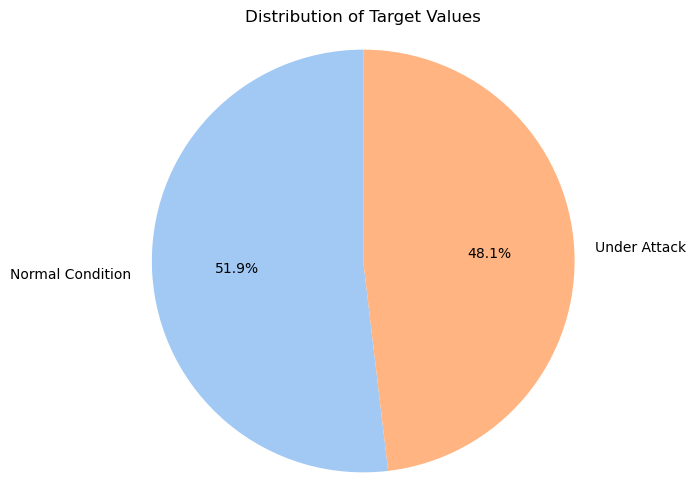

In [6]:
# Checking the distribution of target values
target_counts = data['target'].value_counts()
print(target_counts)

# Mapping 1 -> 'Abnormal Condition' and 0 -> 'Normal Condition'
labels = target_counts.index.map({1: 'Under Attack', 0: 'Normal Condition'})

# Plot pie chart for target value distribution
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Target Values')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

<Axes: >

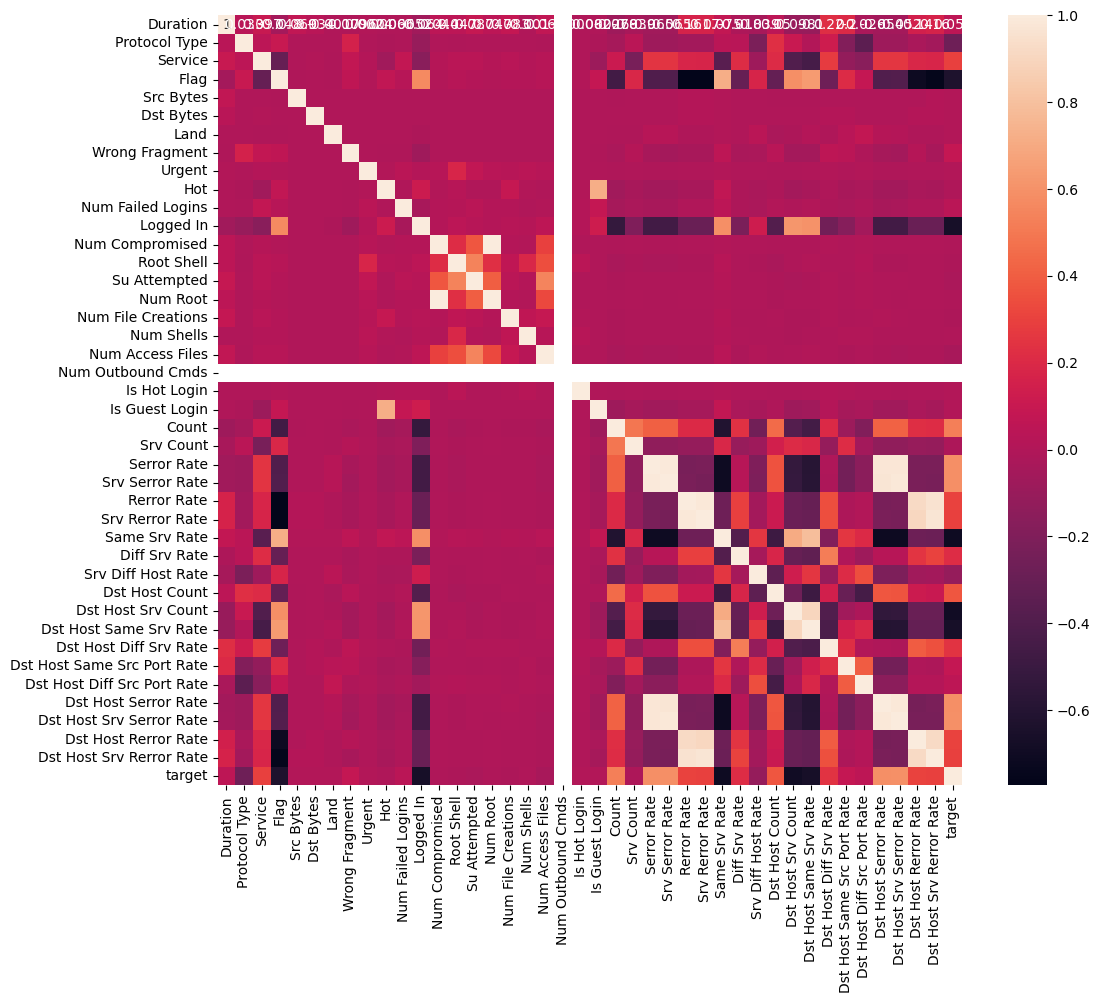

In [11]:
correlation = data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels=correlation.columns,annot=True)

In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

# Assuming `df` is your dataset and `target` is your target column

# Step 1: Correlation-based filtering
def filter_by_correlation(data, target_column, threshold=0.1):
    correlation = data.corr()[target_column].drop(target_column)
    relevant_features = correlation[correlation.abs() >= threshold].index.tolist()
    irrelevant_features = correlation[correlation.abs() < threshold].index.tolist()
    return relevant_features, irrelevant_features

target_column = 'target'  # Replace with your actual target column name
relevant_corr, irrelevant_corr = filter_by_correlation(data, target_column)

# Step 2: Low variance filtering
def filter_by_variance(data, threshold=0.01):
    selector = VarianceThreshold(threshold)
    selector.fit(data)
    relevant_features = data.columns[selector.get_support()].tolist()
    irrelevant_features = data.columns[~selector.get_support()].tolist()
    return relevant_features, irrelevant_features

# Drop the target column before applying variance filtering
features = data.drop(columns=[target_column])
relevant_var, irrelevant_var = filter_by_variance(features)

# Step 3: Feature importance using Random Forest
def filter_by_feature_importance(data, target, threshold=0.01):
    model = RandomForestClassifier(random_state=42)
    X = data.drop(columns=[target])
    y = data[target]
    model.fit(X, y)
    feature_importances = pd.Series(model.feature_importances_, index=X.columns)
    relevant_features = feature_importances[feature_importances >= threshold].index.tolist()
    irrelevant_features = feature_importances[feature_importances < threshold].index.tolist()
    return relevant_features, irrelevant_features

relevant_importance, irrelevant_importance = filter_by_feature_importance(data, target_column)

# Combine all filters to get final irrelevant columns
irrelevant_columns = set(irrelevant_corr).union(irrelevant_var).union(irrelevant_importance)
relevant_columns = [col for col in data.columns if col not in irrelevant_columns]

# Print results
print("Irrelevant Columns:", irrelevant_columns)
print("Relevant Columns:", relevant_columns)


Irrelevant Columns: {'Urgent', 'Num Shells', 'Dst Bytes', 'Srv Rerror Rate', 'Srv Count', 'Num Outbound Cmds', 'Num Compromised', 'Root Shell', 'Rerror Rate', 'Dst Host Same Src Port Rate', 'Num Root', 'Num Failed Logins', 'Srv Diff Host Rate', 'Src Bytes', 'Wrong Fragment', 'Is Guest Login', 'Su Attempted', 'Hot', 'Num Access Files', 'Is Hot Login', 'Dst Host Diff Src Port Rate', 'Num File Creations', 'Duration', 'Dst Host Srv Serror Rate', 'Land'}
Relevant Columns: ['Protocol Type', 'Service', 'Flag', 'Logged In', 'Count', 'Serror Rate', 'Srv Serror Rate', 'Same Srv Rate', 'Diff Srv Rate', 'Dst Host Count', 'Dst Host Srv Count', 'Dst Host Same Srv Rate', 'Dst Host Diff Srv Rate', 'Dst Host Serror Rate', 'Dst Host Rerror Rate', 'Dst Host Srv Rerror Rate', 'target']


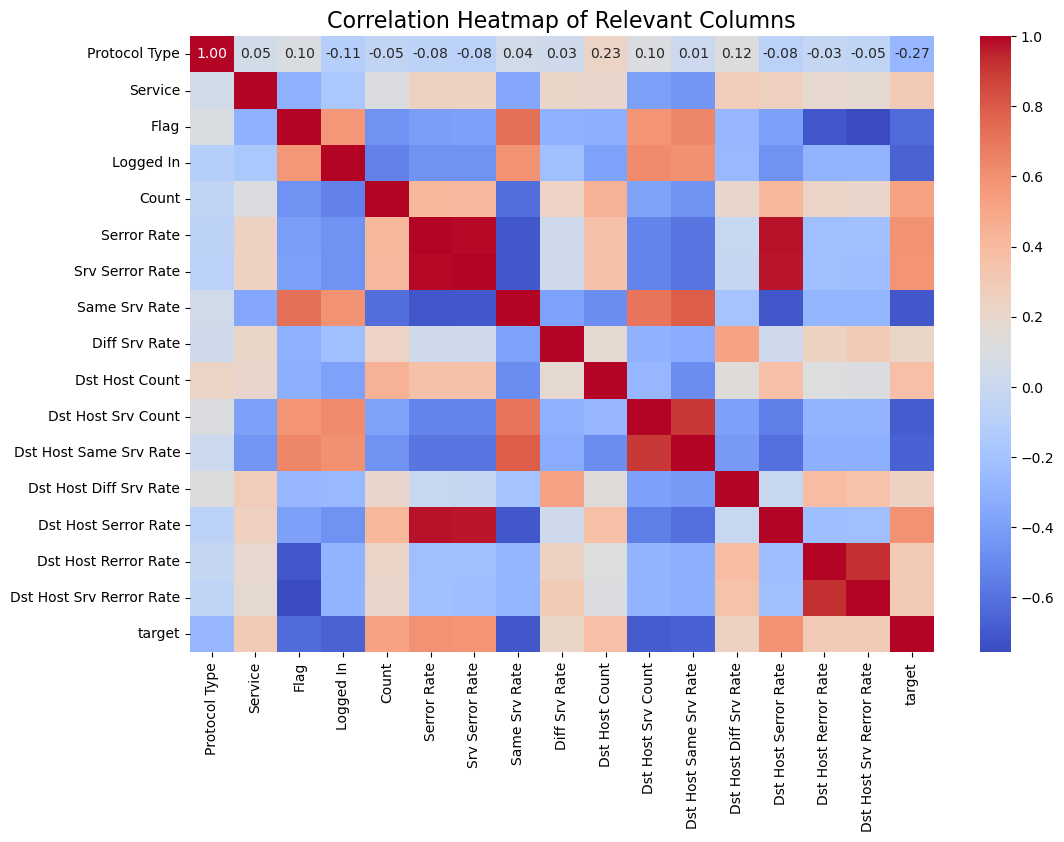

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter dataset to include only relevant columns
relevant_data = data[relevant_columns]  # Use `relevant_columns` from previous step

# Compute correlation matrix
correlation_matrix = relevant_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Relevant Columns", fontsize=16)
plt.show()

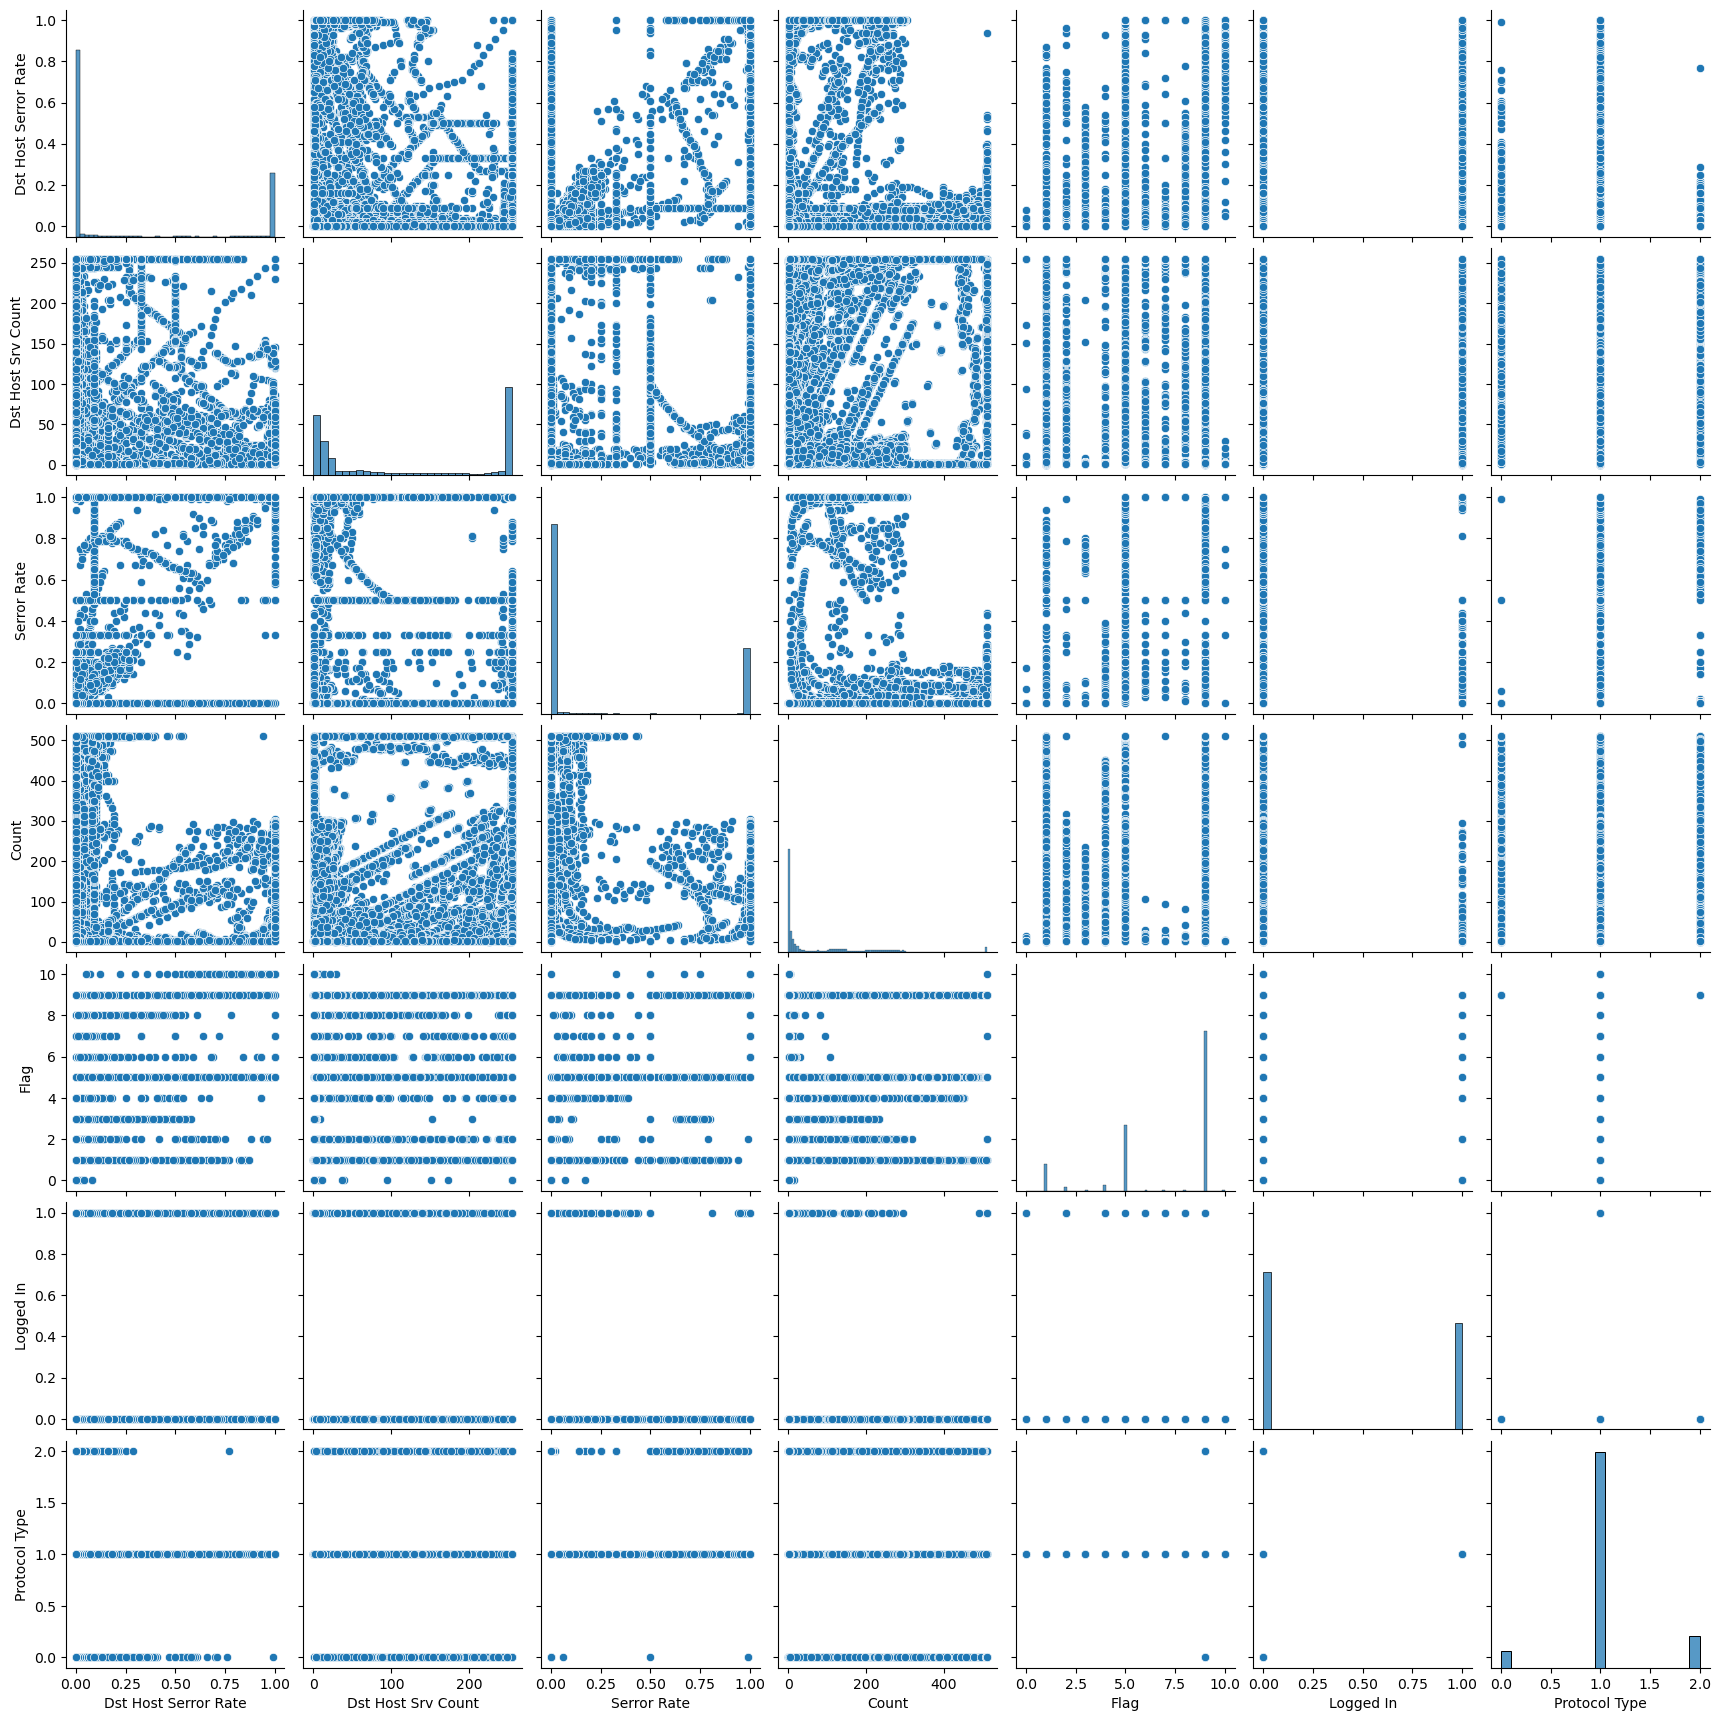

In [12]:
dataset_Pair_Plot = data[['Dst Host Serror Rate','Dst Host Srv Count','Serror Rate','Count','Flag','Logged In','Protocol Type']]
print(sns.pairplot(dataset_Pair_Plot))

In [13]:
# Split the dataset into features and target variable
X = data.drop('target', axis=1)  # Assuming 'label' is the target column
y = data['target']


# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)


In [12]:
# Initialize the RandomForestClassifier with default parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_val_pred = rf_model.predict(X_val)
y_test_pred = rf_model.predict(X_test)

# Accuracy
train_acc = accuracy_score(y_train, y_train_pred)
val_acc = accuracy_score(y_val, y_val_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Train Accuracy: {train_acc}')
print(f'Validation Accuracy: {val_acc}')
print(f'Test Accuracy: {test_acc}')

Train Accuracy: 0.9995190504131357
Validation Accuracy: 0.9962807400044887
Test Accuracy: 0.9958105782898182


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6947
           1       1.00      0.99      1.00      6420

    accuracy                           1.00     13367
   macro avg       1.00      1.00      1.00     13367
weighted avg       1.00      1.00      1.00     13367

Confusion Matrix:
Confusion Matrix:
[[6925   22]
 [  34 6386]]


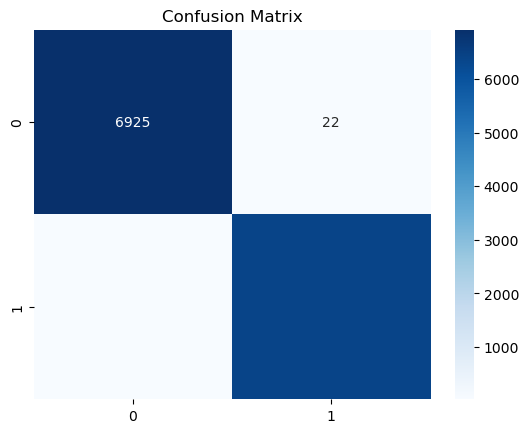

In [20]:
# Classification report and confusion matrix for validation set
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_test_pred
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

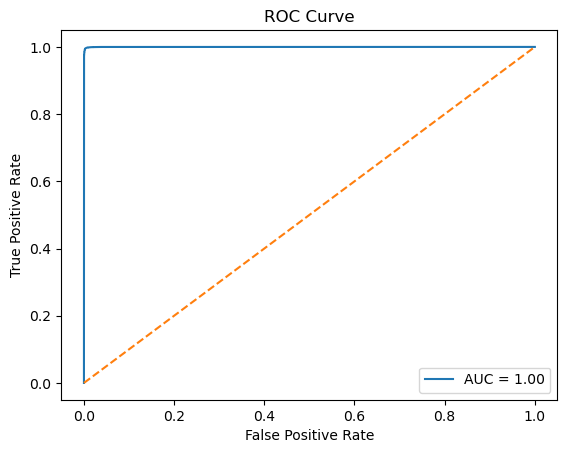

ROC-AUC Score (Validation): 1.00


In [22]:
# Calculate ROC-AUC
y_val_prob = rf_model.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = roc_auc_score(y_val, y_val_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"ROC-AUC Score (Validation): {roc_auc:.2f}")

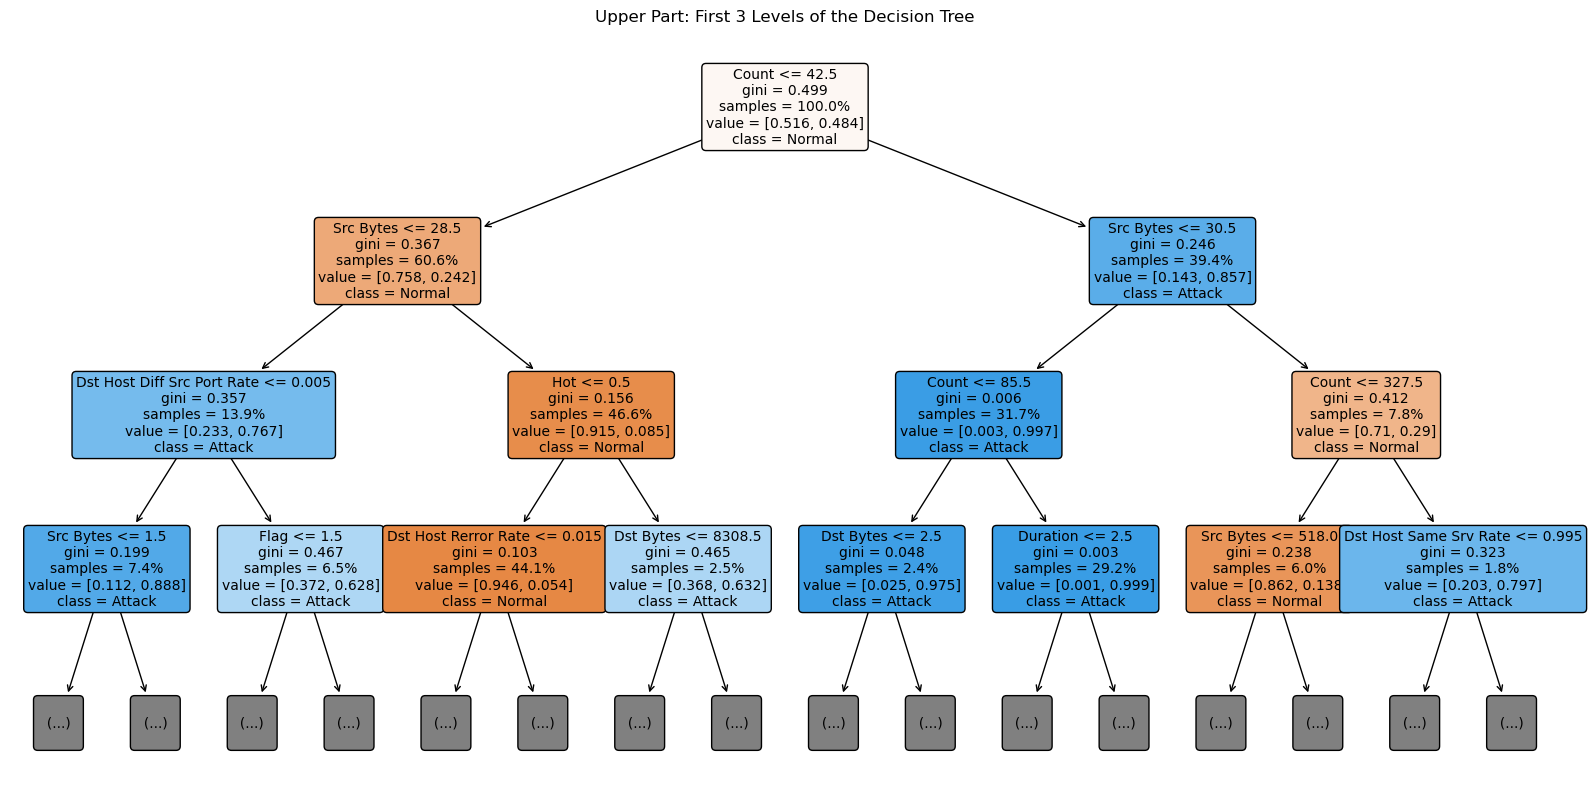

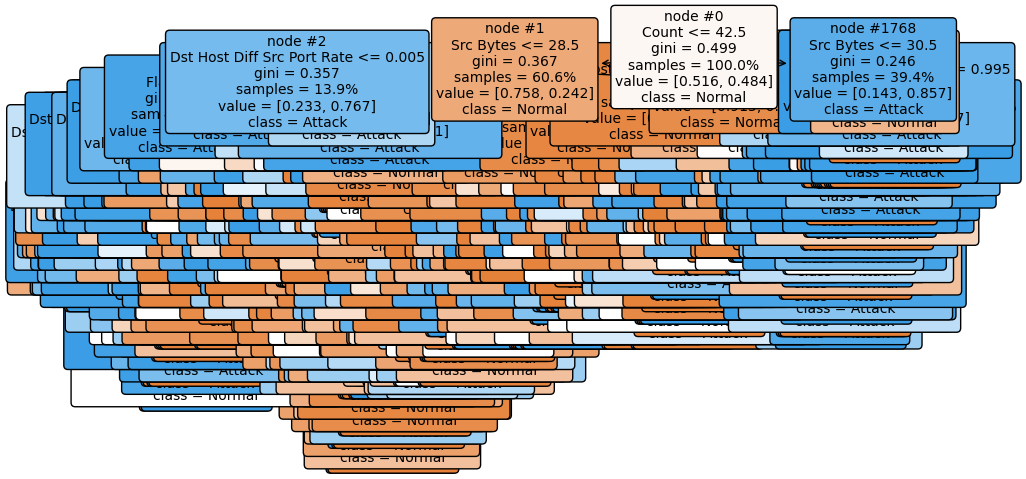

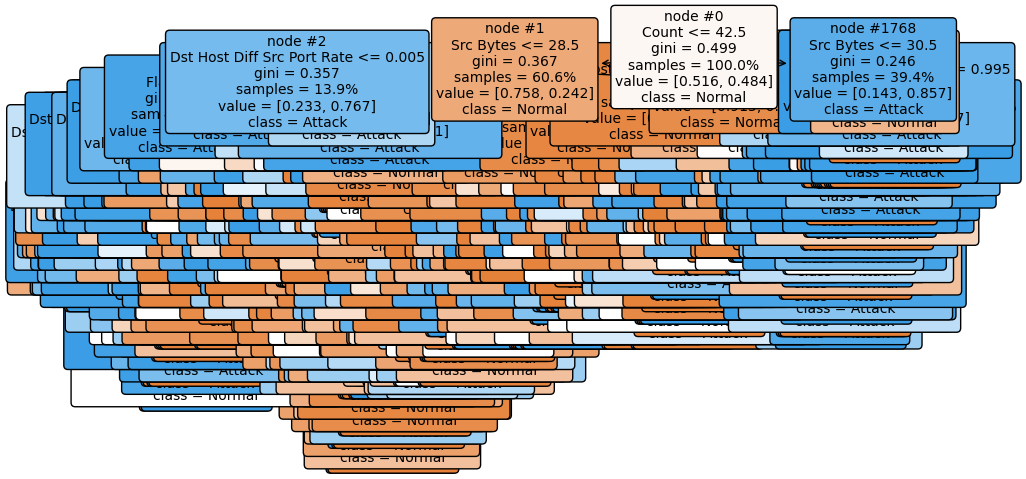

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import numpy as np

# Extract a single decision tree from the Random Forest
estimator = rf_model.estimators_[0]  # Replace with your Random Forest model if necessary

# Function to find the last 2 leaf nodes
def get_last_leaf_nodes(tree, num_leaves=2):
    # Get all nodes, and then filter for leaf nodes
    leaf_indices = np.where(tree.tree_.children_left == -1)[0]
    # Select the last 'num_leaves' leaf nodes
    return leaf_indices[-num_leaves:]

# Plot the upper part (first 3 levels) of the tree
plt.figure(figsize=(20, 10))  # Set the figure size
plot_tree(estimator, 
          filled=True, 
          feature_names=X.columns,  # Use your feature names
          class_names=['Normal', 'Attack'],  # Use your target classes
          rounded=True, 
          proportion=True, 
          fontsize=10, 
          max_depth=3)  # Only show up to 3 levels
plt.title("Upper Part: First 3 Levels of the Decision Tree")
plt.show()

# Now, plot only the last 2 leaf nodes
last_leaf_nodes = get_last_leaf_nodes(estimator, num_leaves=2)

# Function to plot individual leaf nodes
def plot_leaf_node(tree, node_id):
    plt.figure(figsize=(10, 5))  # Set size for each leaf
    plot_tree(tree, 
              filled=True, 
              feature_names=X.columns, 
              class_names=['Normal', 'Attack'], 
              rounded=True, 
              proportion=True, 
              fontsize=10, 
              max_depth=None,  # Ensure entire tree is plotted for the leaf
              node_ids=[node_id])  # Plot specific node
    plt.title(f"Leaf Node {node_id}")
    plt.show()

# Plot the last 2 leaf nodes individually
for node in last_leaf_nodes:
    plot_leaf_node(estimator, node)


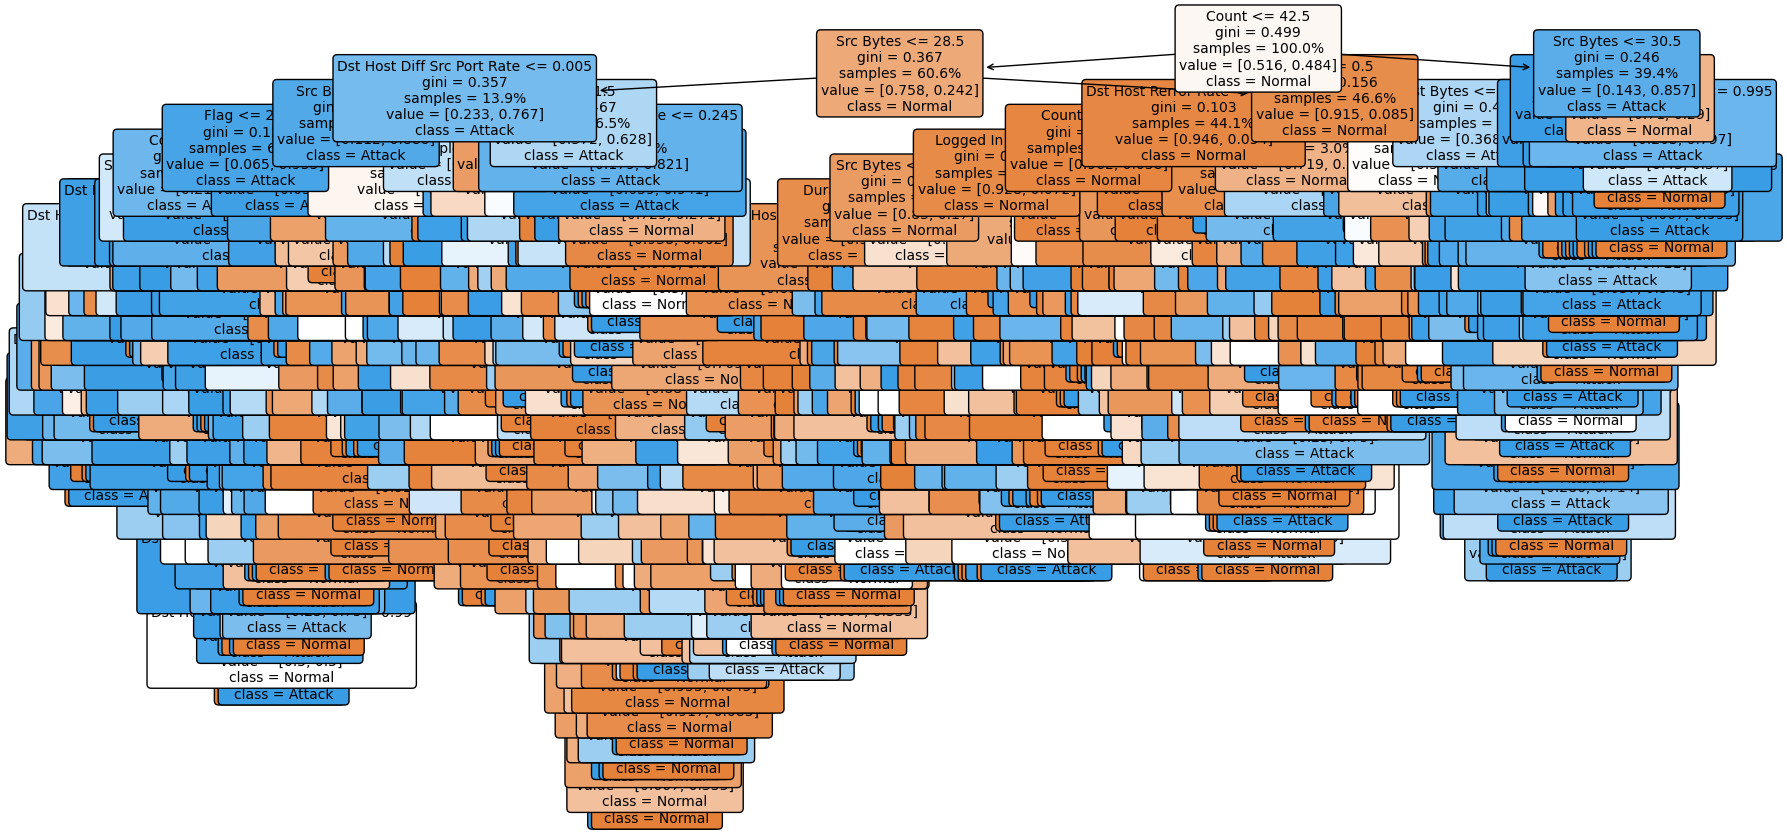

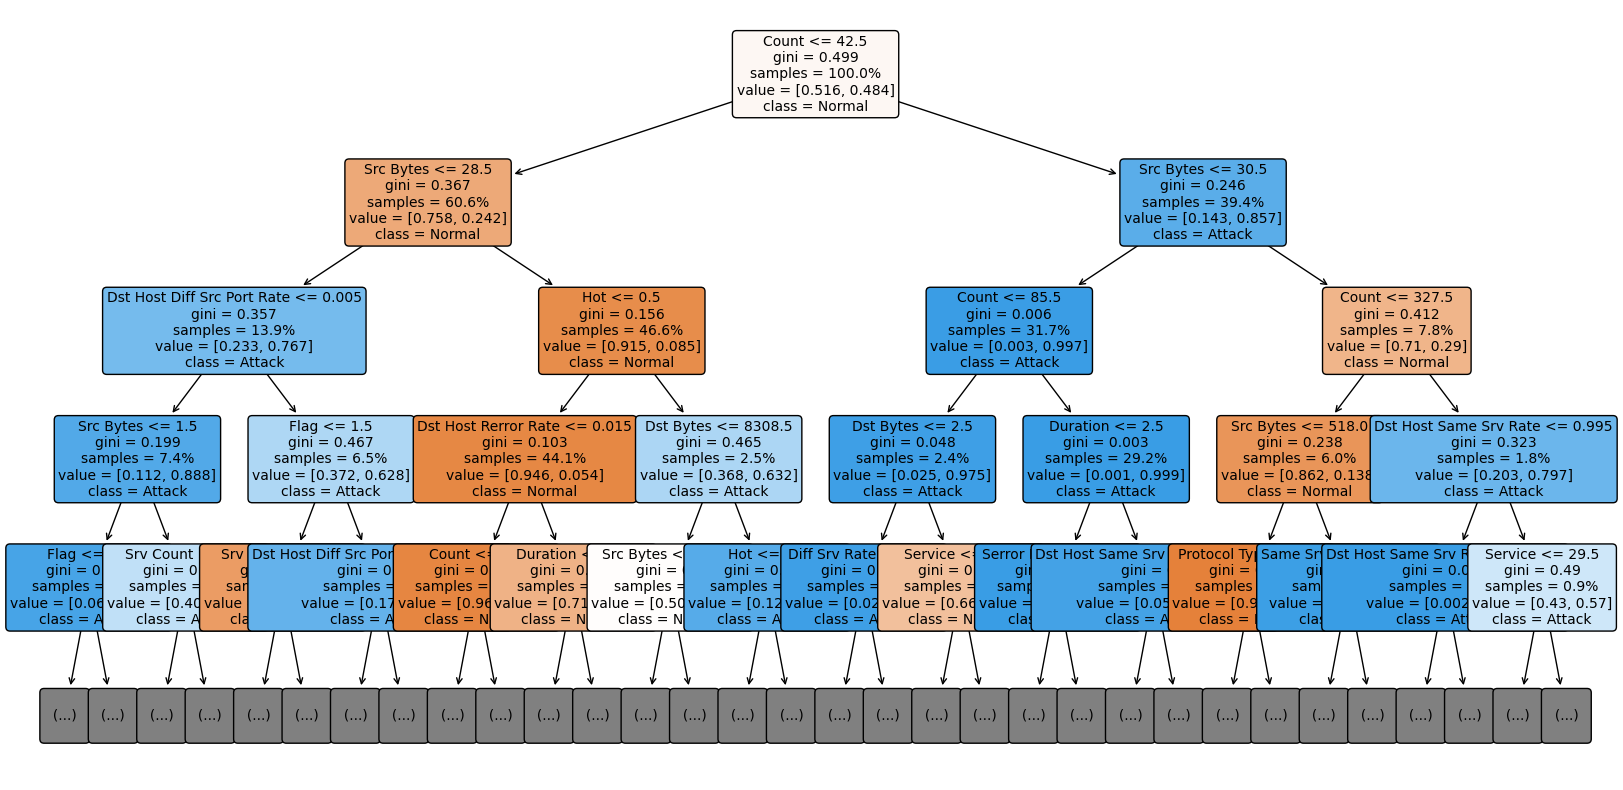

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming you have trained a Random Forest model `rf_model`
# Extract a single decision tree from the Random Forest
estimator = rf_model.estimators_[0]  # Replace with your model if necessary

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set the figure size for better readability
plot_tree(estimator, 
          filled=True, 
          feature_names=X.columns,  # Use feature names if available
          class_names=['Normal', 'Attack'],  # Set the target classes
          rounded=True, 
          proportion=True, 
          fontsize=10)
plt.show()

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
estimator = rf_model.estimators_[0]  # You can also use rf_model_tuned if it's trained

# Plot the decision tree with limited depth (e.g., 3 levels)
plt.figure(figsize=(20, 10))  # Adjust the figure size for readability
plot_tree(estimator, 
          filled=True, 
          feature_names=X.columns,  # Use feature names if available
          class_names=['Normal', 'Attack'],  # Target classes
          rounded=True, 
          proportion=True, 
          fontsize=10,
          max_depth=4)  # Only show up to 3 levels of the tree
plt.show()

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best Parameters from GridSearchCV: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy with GridSearchCV: 0.9963342560035909
Classification Report with GridSearchCV:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6947
           1       1.00      0.99      1.00      6420

    accuracy                           1.00     13367
   macro avg       1.00      1.00      1.00     13367
weighted avg       1.00      1.00      1.00     13367

Confusion Matrix with GridSearchCV:
[[6933   14]
 [  35 6385]]


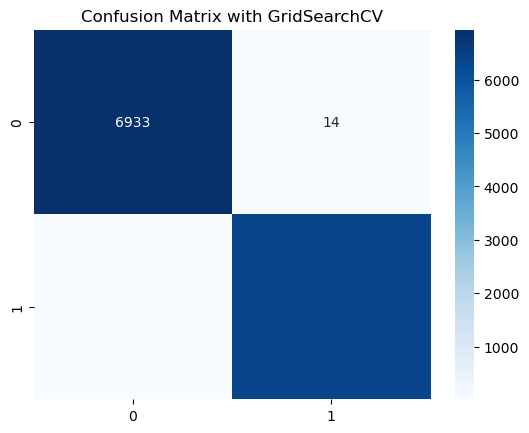

Precision with GridSearchCV: 0.9963387100714826
Recall with GridSearchCV: 0.9963342560035909
F1-Score with GridSearchCV: 0.9963340195071404


ValueError: continuous format is not supported

In [14]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print(f'Best Parameters from GridSearchCV: {grid_search.best_params_}')

# Predict on test set with best parameters
best_grid = grid_search.best_estimator_
y_test_pred_grid = best_grid.predict(X_test)

# Calculate accuracy
test_accuracy_grid = accuracy_score(y_test, y_test_pred_grid)
print(f'Test Accuracy with GridSearchCV: {test_accuracy_grid}')

# Classification report
print('Classification Report with GridSearchCV:')
print(classification_report(y_test, y_test_pred_grid))

# Confusion matrix
conf_matrix_grid = confusion_matrix(y_test, y_test_pred_grid)
print('Confusion Matrix with GridSearchCV:')
print(conf_matrix_grid)
sns.heatmap(conf_matrix_grid, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with GridSearchCV")
plt.show()

# Precision, Recall, F1-Score
precision_grid = precision_score(y_test, y_test_pred_grid, average='weighted')
recall_grid = recall_score(y_test, y_test_pred_grid, average='weighted')
f1_grid = f1_score(y_test, y_test_pred_grid, average='weighted')
print(f'Precision with GridSearchCV: {precision_grid}')
print(f'Recall with GridSearchCV: {recall_grid}')
print(f'F1-Score with GridSearchCV: {f1_grid}')

# ROC Curve and AUC
y_test_prob_grid = best_grid.predict_proba(X_test)[:, 1]
fpr_grid, tpr_grid, thresholds_grid = roc_curve(y_test, y_test_prob_grid)
roc_auc_grid =roc_auc_score(fpr_grid, tpr_grid)

plt.figure()
plt.plot(fpr_grid, tpr_grid, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_grid:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with GridSearchCV')
plt.legend(loc='lower right')
plt.show()

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters from RandomizedSearchCV: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}
Test Accuracy with RandomizedSearchCV: 0.9961098226976883
Classification Report with RandomizedSearchCV:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6947
           1       1.00      0.99      1.00      6420

    accuracy                           1.00     13367
   macro avg       1.00      1.00      1.00     13367
weighted avg       1.00      1.00      1.00     13367

Confusion Matrix with RandomizedSearchCV:
[[6929   18]
 [  34 6386]]


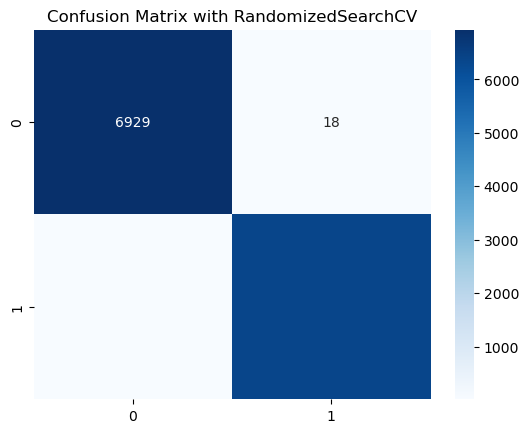

Precision with RandomizedSearchCV: 0.9961123030860655
Recall with RandomizedSearchCV: 0.9961098226976883
F1-Score with RandomizedSearchCV: 0.9961096332285114


ValueError: continuous format is not supported

In [15]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1000, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
print(f'Best Parameters from RandomizedSearchCV: {random_search.best_params_}')

# Predict on test set with best parameters
best_random = random_search.best_estimator_
y_test_pred_random = best_random.predict(X_test)

# Calculate accuracy
test_accuracy_random = accuracy_score(y_test, y_test_pred_random)
print(f'Test Accuracy with RandomizedSearchCV: {test_accuracy_random}')

# Classification report
print('Classification Report with RandomizedSearchCV:')
print(classification_report(y_test, y_test_pred_random))

# Confusion matrix
conf_matrix_random = confusion_matrix(y_test, y_test_pred_random)
print('Confusion Matrix with RandomizedSearchCV:')
print(conf_matrix_random)
sns.heatmap(conf_matrix_random, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix with RandomizedSearchCV")
plt.show()


# Precision, Recall, F1-Score
precision_random = precision_score(y_test, y_test_pred_random, average='weighted')
recall_random = recall_score(y_test, y_test_pred_random, average='weighted')
f1_random = f1_score(y_test, y_test_pred_random, average='weighted')
print(f'Precision with RandomizedSearchCV: {precision_random}')
print(f'Recall with RandomizedSearchCV: {recall_random}')
print(f'F1-Score with RandomizedSearchCV: {f1_random}')

# ROC Curve and AUC
y_test_prob_random = best_random.predict_proba(X_test)[:, 1]
fpr_random, tpr_random, thresholds_random = roc_curve(y_test, y_test_prob_random)
roc_auc_random = roc_auc_score(fpr_random, tpr_random)

plt.figure()
plt.plot(fpr_random, tpr_random, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_random:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with RandomizedSearchCV')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Train the final model using the best parameters
final_model = RandomForestClassifier(**best_random, random_state=42)
final_model.fit(X_train, y_train)

# Predictions
y_train_final_pred = final_model.predict(X_train)
y_val_final_pred = final_model.predict(X_val)
y_test_final_pred = final_model.predict(X_test)

# Accuracy
train_final_acc = accuracy_score(y_train, y_train_final_pred)
val_final_acc = accuracy_score(y_val, y_val_final_pred)
test_final_acc = accuracy_score(y_test, y_test_final_pred)

print(f'Final Train Accuracy: {train_final_acc}')
print(f'Final Validation Accuracy: {val_final_acc}')
print(f'Final Test Accuracy: {test_final_acc}')

# Classification Report
print("Final Classification Report (Validation):")
print(classification_report(y_val, y_val_final_pred))

# Confusion Matrix
print("Final Confusion Matrix (Validation):")
conf_matrix_final = confusion_matrix(y_val, y_val_final_pred)
sns.heatmap(conf_matrix_final, annot=True, fmt='d', cmap='Blues')
plt.title("Final Confusion Matrix (Validation)")
plt.show()

# ROC Curve
y_val_final_prob = final_model.predict_proba(X_val)[:, 1]
fpr_final, tpr_final, thresholds_final = roc_curve(y_val, y_val_final_prob)
roc_auc_final = roc_auc_score(y_val, y_val_final_prob)

plt.plot(fpr_final, tpr_final, label=f'Final AUC = {roc_auc_final:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Final ROC Curve (Validation)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print(f"Final ROC-AUC Score (Validation): {roc_auc_final:.2f}")